## ECE495 Lab 1

Documentation: Asked Alex where to look for norm, he said nengo utils documentation. Asked how he combined the two lines, he said put them to the same output node. Looked up how to implement relu with numpy. 

#### Set up

**Ensure you are using your [495 Virtual Environment](https://github.com/kaitlin-fair/495venv_setup) before you begin!**  
    
Import Nengo and other supporting libraries into your program to get started:

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

import nengo
from nengo.utils.matplotlib import rasterplot
from nengo.dists import Uniform
from nengo.processes import WhiteSignal
from nengo.processes import Piecewise

#### Build model

In [53]:
# Create the model object
model = nengo.Network(label="Lab1")
with model:
    # Create a piecewise step function for input and output node
    input = nengo.Node(Piecewise({0: -5, 1: -2, 2: 3, 3: 5, 4: -2}))
    output = nengo.Node(size_in=1)
    correct_ans = Piecewise({0: 5, 1: 1, 2: 3, 3: 7, 4: 1})

    # Create 4 ensembles of leaky integrate-and-fire neurons
    A = nengo.Ensemble(100, dimensions=1, radius=5)
    B = nengo.Ensemble(100, dimensions=1, radius=5)
    C = nengo.Ensemble(100, dimensions=1, radius=5)
    D = nengo.Ensemble(100, dimensions=1, radius=5)
    E = nengo.Ensemble(200, dimensions=2, radius=8)
    # combined = nengo.Ensemble(
    #     220, dimensions=2, radius=15
    # )  # This radius is ~sqrt(10^2+10^2)
    # prod = nengo.Ensemble(100, dimensions=1, radius=20)

    # # Connect input ensembles A and B to the 2D combined ensemble
    # nengo.Connection(A, combined[0])
    # nengo.Connection(B, combined[1])

    # Define a function that computes the multiplication of two inputs
    def relu(x):
        return np.maximum(0, x)

    def absolute(x):
        return np.absolute(x)

    def funtimes(x):
        return 2 * x - 5

    def neg(x):
        return -x

    # dont want to call it norm
    def final(x):
        return nengo.utils.numpy.norm(x)

    # Connect the input nodes to the appropriate ensembles
    nengo.Connection(input, A)
    nengo.Connection(A, C, function=relu)
    nengo.Connection(C, E[0], function=neg)
    nengo.Connection(E, output, function=final)

    nengo.Connection(input, B)
    nengo.Connection(B, D, function=absolute)
    nengo.Connection(D, E[1], function=funtimes)
    # nengo.Connection(combined, prod, function=product)

#### Probe all the things and run it!

In [54]:
with model:
    input_probe = nengo.Probe(input)
    A_probe = nengo.Probe(A, synapse=0.01)
    E_probe = nengo.Probe(E, synapse=0.01)
    D_probe = nengo.Probe(D, synapse=0.01)
    # F_probe = nengo.Probe(F, synapse=0.01)
    # B_probe = nengo.Probe(B, synapse=0.01)
    out_probe = nengo.Probe(output, synapse=0.01)


# Create the simulator
with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
    sim.run(5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

#### Plot Results

(-10.0, 10.0)

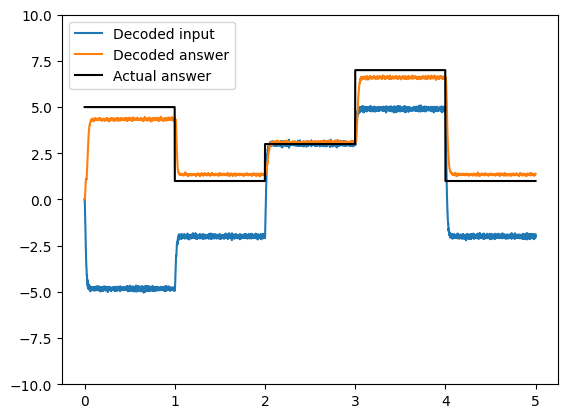

In [55]:
# Plot the input signals and decoded ensemble values
plt.figure()
plt.plot(sim.trange(), sim.data[A_probe], label="Decoded input")
# plt.plot(sim.trange(), sim.data[E_probe], label="E")
# plt.plot(sim.trange(), sim.data[F_probe], label="F")
# plt.plot(sim.trange(), sim.data[D_probe], label="D")
# plt.plot(sim.trange(), sim.data[B_probe], label="Decoded B")
plt.plot(sim.trange(), sim.data[out_probe], label="Decoded answer")
plt.plot(
    sim.trange(), correct_ans.run(sim.time, dt=sim.dt), c="k", label="Actual answer"
)

plt.legend(loc="best")
plt.ylim(-10, 10)